In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\Pc\\Downloads\\predicting-churn-for-bank-customers (1)\\Churn_Modelling.csv')

In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [11]:
#data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

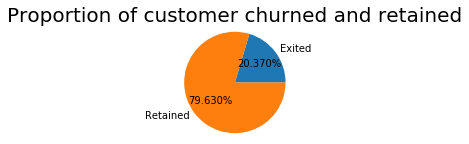

In [16]:
#labels = 'Exited','Retained'
#sizes =[data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()] 
#fig,ax = plt.subplots(figsize=(2,2))
#ax.pie(sizes,labels=labels,autopct = '%1.1f%%')
#ax.axis('equal')
#plt.title('Proportion of customer churned and retained',size=20)
#plt.show()
labels = 'Exited','Retained'
sizes = [data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()]
fig,ax=plt.subplots(figsize=(2,2))
ax.pie(sizes,labels=labels,autopct='%2.3f%%')
ax.axis('equal')
plt.title('Proportion of customer churned and retained',size=20)
plt.show()

In [17]:
cols_int = data.select_dtypes(include='object').columns
cols_int

Index(['Geography', 'Gender'], dtype='object')

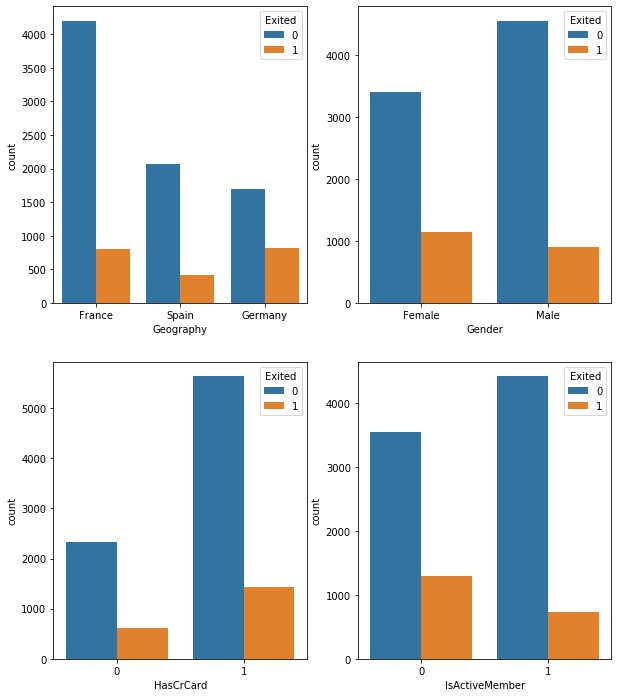

In [13]:
fig,arr = plt.subplots(2,2,figsize=(10,12))
sns.countplot(x='Geography',hue='Exited',data=data,ax=arr[0][0])
sns.countplot(x='Gender',hue='Exited',data=data,ax=arr[0][1])
sns.countplot(x='HasCrCard',hue='Exited',data=data,ax=arr[1][0])
sns.countplot(x='IsActiveMember',hue='Exited',data=data,ax=arr[1][1])

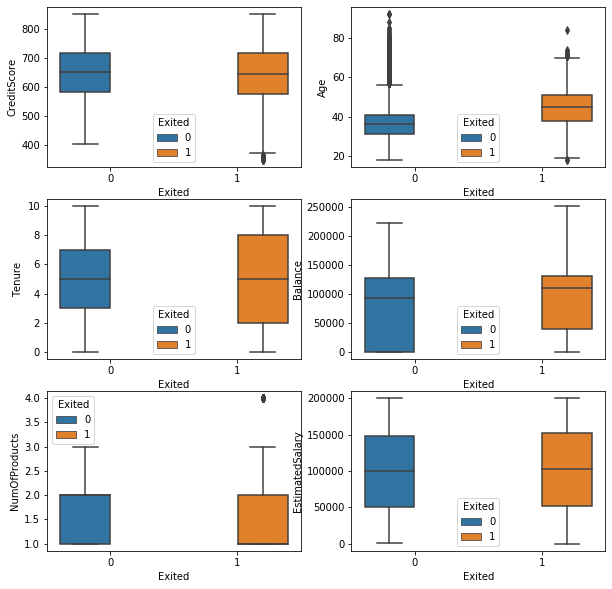

In [14]:
fig,arr = plt.subplots(3,2,figsize=(10,10))
sns.boxplot(y='CreditScore',x='Exited',hue='Exited',data=data,ax=arr[0][0])
sns.boxplot(y='Age',x='Exited',hue='Exited',data=data,ax=arr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=arr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=arr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=arr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=arr[2][1])

# Feature Engineering

In [15]:
#from sklearn.model_selection import train_test_split
#df_train,df_test=train_test_split(data,test_size=0.20,random_state=42)


In [16]:
#df_train.shape

In [17]:
#df_test.shape

In [18]:
data['BalanceRatio'] = data['Balance']/data['EstimatedSalary']

In [19]:
#sns.boxplot(x='BalanceRatio',y='Exited',data=data,hue='Exited')

In [20]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceRatio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055


In [22]:
data = pd.get_dummies(data,columns=['Geography','Gender'])

In [23]:
data.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceRatio,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0,0,1,1,0


In [29]:
continues_var = ['CreditScore','Age','Tenure','Balance','NumOfProducts', 'EstimatedSalary', 'BalanceRatio']

Scaling of the Data

In [32]:
minvec = data[continues_var].min().copy()
maxvec = data[continues_var].max().copy()
data[continues_var] = (data[continues_var] - minvec)/(maxvec-minvec)

In [33]:
data[continues_var].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceRatio
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.000000
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.000070
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.000132
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.000000
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.000150


In [38]:
X = data.drop('Exited',axis=1).values
Y = data['Exited'].values

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

# Model Fitting

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import  XGBClassifier

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [45]:
model = LogisticRegression()
model = model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
y_pred = model.predict(x_test)
report = classification_report(y_pred,y_test,output_dict=True)
df = pd.DataFrame(report).transpose()

In [57]:
df

,f1-score,precision,recall,support
0,0.891830,0.964530,0.829320,1869.000
1,0.282443,0.188295,0.564885,131.000
accuracy,0.812000,0.812000,0.812000,0.812
macro avg,0.587136,0.576413,0.697103,2000.000
weighted avg,0.851915,0.913687,0.812000,2000.000


Decesion Tree

In [62]:
model = DecisionTreeClassifier(max_depth=3)
model = model.fit(x_train,y_train)

In [63]:
y_pred = model.predict(x_test)

In [64]:
report = classification_report(y_pred,y_test,output_dict=True)
df = pd.DataFrame(report).transpose()

In [65]:
df

,f1-score,precision,recall,support
0,0.909741,0.950218,0.872571,1750.0000
1,0.528771,0.432570,0.680000,250.0000
accuracy,0.848500,0.848500,0.848500,0.8485
macro avg,0.719256,0.691394,0.776286,2000.0000
weighted avg,0.862120,0.885512,0.848500,2000.0000


In [68]:
model.score(x_test,y_test)

0.8485

In [69]:
estimators = range(10,100,10)
score = []
for i in estimators:
    model = RandomForestClassifier(n_estimators=i,random_state=42)
    model = model.fit(x_train,y_train)
    score.append(model.score(x_test,y_test))
    

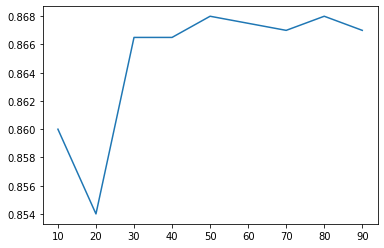

In [70]:
plt.plot(estimators,score)
plt.show()

 XGBClassifier

In [71]:
model =  XGBClassifier()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [78]:
report = classification_report(y_pred,y_test,output_dict=True)
df = pd.DataFrame(report).transpose()

In [79]:
df

,f1-score,precision,recall,support
0,0.918871,0.962041,0.879408,1758.0000
1,0.570079,0.460560,0.747934,242.0000
accuracy,0.863500,0.863500,0.863500,0.8635
macro avg,0.744475,0.711300,0.813671,2000.0000
weighted avg,0.876667,0.901362,0.863500,2000.0000
